In [1]:
import pandas as pd
data = pd.read_csv('C:/Users/hp/Desktop/prj_pfe_inwi/voice_bts.csv') 
print(data.columns)

Index(['dn', 'contract_id', 'profile_id', 'subprofile', 'produit', 'full_vol',
       'full_secteur', 'full_city'],
      dtype='object')


In [2]:
# Filtrer les colonnes catégorielles de type 'object'
colonnes_categorielles = data.select_dtypes(include=['object'])

# Afficher les colonnes catégorielles
print(colonnes_categorielles.columns)

Index(['dn', 'contract_id', 'subprofile', 'produit', 'full_secteur',
       'full_city'],
      dtype='object')


In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for colonne in colonnes_categorielles.columns:
    # Encoder la variable catégorielle
    encoded_variable = label_encoder.fit_transform(data[colonne])
    # Assigner les valeurs encodées à la colonne correspondante dans la dataframe
    data[colonne] = encoded_variable

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:8

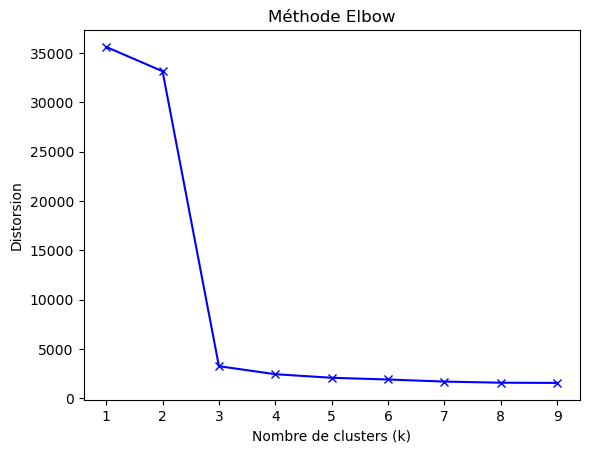

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
from scipy.spatial.distance import cdist

# Sélectionner les colonnes pertinentes pour la méthode Elbow
# Ajoutez les noms des colonnes supplémentaires à la liste features
features = data[['profile_id', 'subprofile', 'produit', 'full_vol',
       'full_secteur', 'full_city']]

# Normaliser les données si nécessaire (utilisez StandardScaler ou MinMaxScaler)

# Appliquer la méthode Elbow pour déterminer le nombre optimal de clusters
distortions = []
K = range(1, 10)  # Essayer différents nombres de clusters
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(features)
    kmeanModel.fit(features)
    distortions.append(sum(np.min(cdist(features, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0])

# Tracer la courbe de la variance expliquée en fonction du nombre de clusters
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distorsion')
plt.title('Méthode Elbow')
plt.show()


In [7]:
from sklearn.cluster import KMeans
import pandas as pd

# Sélection des colonnes pertinentes
selected_columns = ['profile_id', 'subprofile', 'produit', 'full_vol',
       'full_secteur', 'full_city']

# Extraction des données à partir des colonnes sélectionnées
X = data[selected_columns]

# Instanciation et ajustement du modèle K-means
k = 3  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Récupération des coordonnées des centres de cluster
cluster_centers = kmeans.cluster_centers_

# Affichage des étiquettes de cluster pour chaque point de données
print(labels)

# Affichage des coordonnées des centres de cluster
print(cluster_centers)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 2 ... 0 0 0]
[[8.40883709e+04 9.11919759e-01 4.86532589e+01 1.55790543e+00
  5.18453947e+03 1.74730932e+01]
 [6.48270708e+05 1.33226763e-15 5.58322148e+01 1.63852124e+00
  4.86230201e+03 1.62617450e+01]
 [4.33310186e+03 2.04937868e+00 6.35673643e+01 1.25926879e+00
  5.36562974e+03 1.86122466e+01]]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(X, labels)
print("Le score de silhouette moyen est :", silhouette_avg)

Le score de silhouette moyen est : 0.8062955304950201


Le score de silhouette moyen est : 0.944754545420752


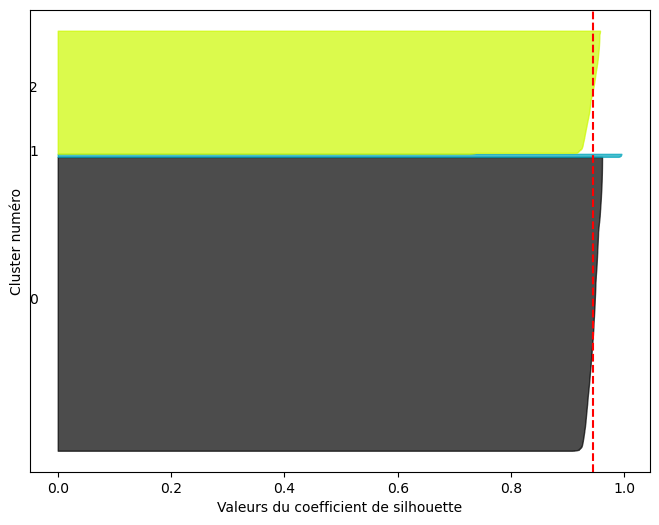

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

# Calcul du score de silhouette pour l'ensemble des données
silhouette_avg = silhouette_score(X, labels)
print("Le score de silhouette moyen est :", silhouette_avg)
# Calcul des scores de silhouette pour chaque point de données
sample_silhouette_values = silhouette_samples(X, labels)

# Création d'un graphique en barres pour afficher les scores de silhouette
plt.figure(figsize=(8, 6))
y_lower = 10
for i in range(k):
    # Regroupez les scores de silhouette pour chaque cluster et triez-les
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    # Calculez la hauteur de la barre
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Remplissez le graphique en barres
    color = plt.cm.nipy_spectral(float(i) / k)
  
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Étiquette pour les clusters
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcul de la prochaine position y_lower pour le prochain graphique
    y_lower = y_upper + 10

plt.xlabel("Valeurs du coefficient de silhouette")
plt.ylabel("Cluster numéro")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Ligne verticale pour le score de silhouette moyen
plt.yticks([])  # Supprimer les numéros de cluster (facultatif)
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


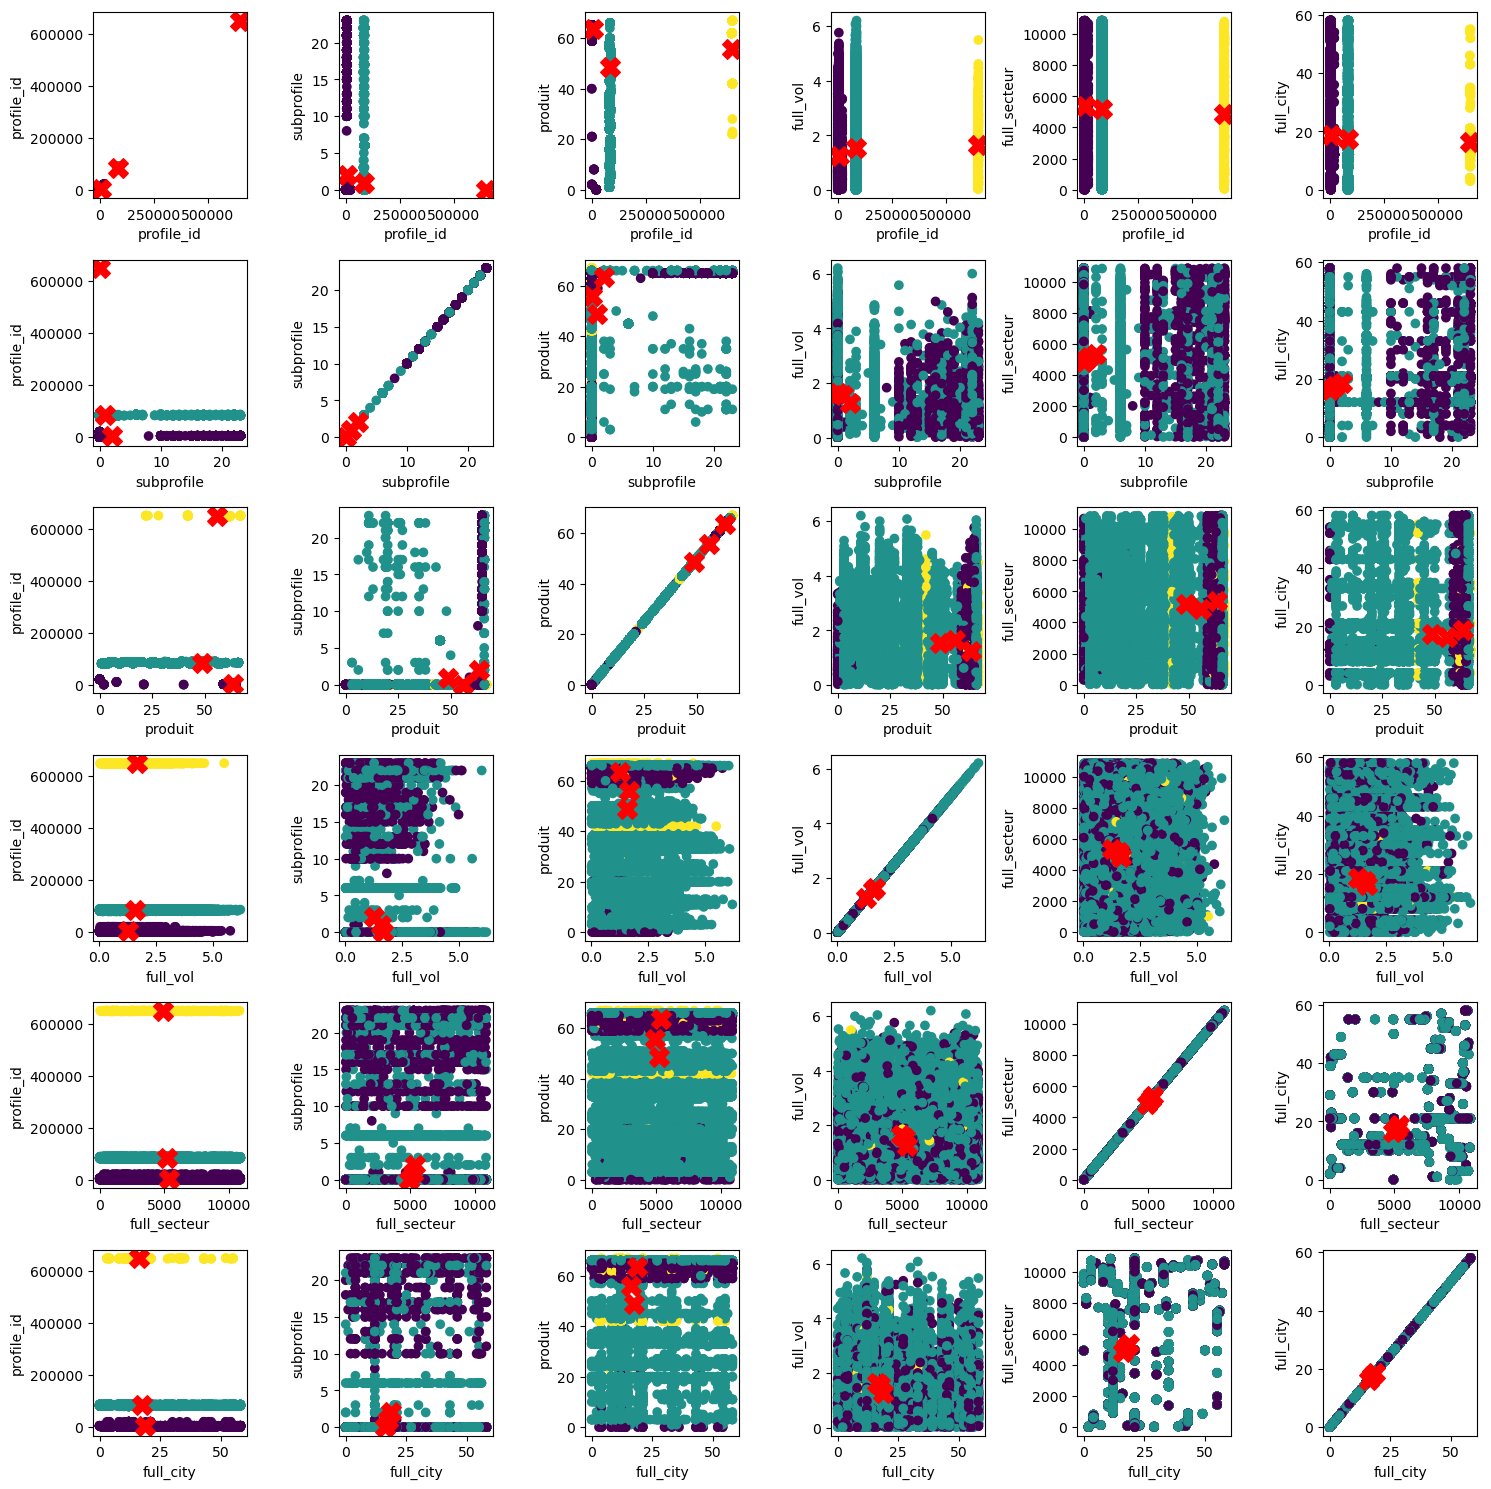

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

# Création d'un dataframe avec les colonnes spécifiées
df = pd.DataFrame(data, columns=['profile_id', 'subprofile', 'produit', 'full_vol',
       'full_secteur', 'full_city'])

# Liste des colonnes à utiliser pour le clustering et les scatter plots
columns = ['profile_id', 'subprofile', 'produit', 'full_vol',
       'full_secteur', 'full_city']

# Création d'un objet KMeans avec le nombre de clusters désiré
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)

# Ajustement du modèle sur les données
kmeans.fit(df[columns])

# Prédiction des clusters pour chaque ligne du dataframe
labels = kmeans.predict(df[columns])

# Obtention des coordonnées des centres de clusters
cluster_centers = kmeans.cluster_centers_

# Affichage de la matrice de scatter plots avec les clusters, les groupes et les centres de clusters
fig, axes = plt.subplots(len(columns), len(columns), figsize=(15, 15))

for i, ax in enumerate(axes):
    for j, subplot_ax in enumerate(ax):
        # Scatter plot pour la combinaison de colonnes (i, j)
        subplot_ax.scatter(df[columns[i]], df[columns[j]], c=labels)
        subplot_ax.scatter(cluster_centers[:, i], cluster_centers[:, j], marker='X', color='red', s=200)
        subplot_ax.set_xlabel(columns[i])
        subplot_ax.set_ylabel(columns[j])

plt.tight_layout()
plt.show()


In [7]:
from sklearn.cluster import KMeans
import pandas as pd

# Votre code pour l'instanciation et l'ajustement du modèle K-means

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Création d'une nouvelle colonne dans le DataFrame pour les étiquettes de cluster
data['cluster_label'] = labels


In [12]:
print(data['cluster_label'])

0        0
1        0
2        1
3        0
4        0
        ..
41594    0
41595    1
41596    1
41597    0
41598    0
Name: cluster_label, Length: 41599, dtype: int32


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 2 ... 0 0 0]
[[8.40883709e+04 9.11919759e-01 4.86532589e+01 1.55790543e+00
  5.18453947e+03 1.74730932e+01]
 [6.48270708e+05 1.33226763e-15 5.58322148e+01 1.63852124e+00
  4.86230201e+03 1.62617450e+01]
 [4.33310186e+03 2.04937868e+00 6.35673643e+01 1.25926879e+00
  5.36562974e+03 1.86122466e+01]]
Caractéristiques du cluster 0:
profile_id      84088.370909
subprofile          0.911920
produit            48.653259
full_vol            1.557905
full_secteur     5184.539470
full_city          17.473093
dtype: float64


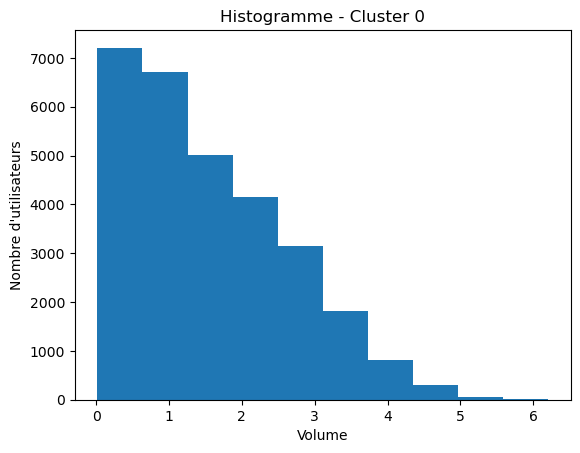

Caractéristiques du cluster 1:
profile_id      648270.708054
subprofile           0.000000
produit             55.832215
full_vol             1.638521
full_secteur      4862.302013
full_city           16.261745
dtype: float64


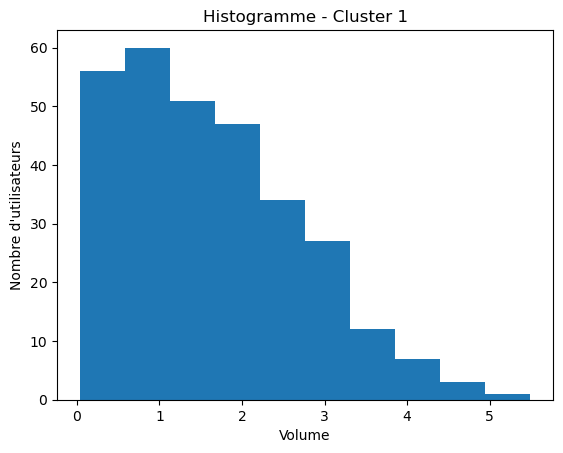

Caractéristiques du cluster 2:
profile_id      4333.101864
subprofile         2.049379
produit           63.567364
full_vol           1.259269
full_secteur    5365.629742
full_city         18.612247
dtype: float64


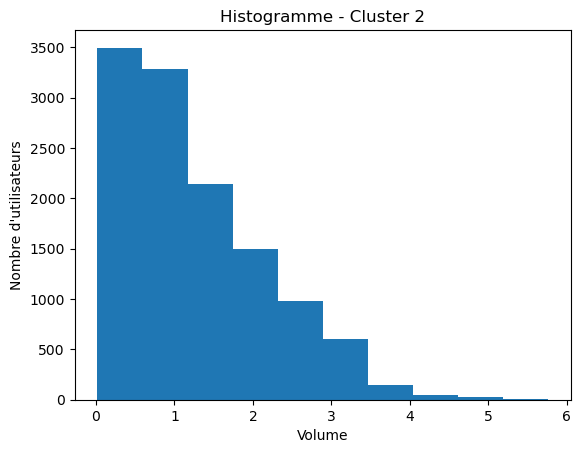

In [12]:
from sklearn.cluster import KMeans
import pandas as pd

# Sélection des colonnes pertinentes
selected_columns = ['profile_id', 'subprofile', 'produit', 'full_vol',
       'full_secteur', 'full_city']

# Extraction des données à partir des colonnes sélectionnées
X = data[selected_columns]

# Instanciation et ajustement du modèle K-means
k = 3  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Récupération des étiquettes de cluster
labels = kmeans.labels_

# Récupération des coordonnées des centres de cluster
cluster_centers = kmeans.cluster_centers_

# Affichage des étiquettes de cluster pour chaque point de données
print(labels)

# Affichage des coordonnées des centres de cluster
print(cluster_centers)

# Extraction des caractéristiques pour chaque classe
data['cluster_labels'] = labels

for cluster_label in range(k):
    cluster_data = data[data['cluster_labels'] == cluster_label]
    cluster_features = cluster_data[selected_columns].mean()
    print(f"Caractéristiques du cluster {cluster_label}:")
    print(cluster_features)
    plt.figure()
    plt.hist(cluster_data['full_vol'], bins=10)
    plt.xlabel('Volume')
    plt.ylabel('Nombre d\'utilisateurs')
    plt.title(f'Histogramme - Cluster {cluster_label}')
    plt.show()
